In [7]:
import pandas as pd
import datetime
import time
import pickle
import os
import numpy as np
import vitaldb
import matplotlib.pyplot as plt

In [5]:
os.listdir('../../../cranberry2/Preprocessing/cache/lowess_filtered/preprocess5')

['pacu_PACU1_9_200526_103443.csv_53',
 'pacu_PACU1_7_200731_115208.csv_44',
 'pacu_PACU1_1_200316_142111.csv_32',
 'pacu_PACU1_6_200916_160020.csv_37',
 'pacu_PACU1_3_200918_005602.csv_47',
 'pacu_PACU1_9_200909_130901.csv_50',
 'pacu_PACU1_4_200116_202919.csv_32',
 'pacu_PACU1_1_200123_095225.csv_25',
 'pacu_PACU1_2_190530_125626.csv_30',
 'pacu_PACU1_4_200707_102804.csv_45',
 'pacu_PACU1_3_190505_210427.csv_36',
 'pacu_PACU1_3_200320_100627.csv_55',
 'pacu_PACU1_12_190704_164600.csv_26',
 'pacu_PACU1_3_190719_193136.csv_31',
 'pacu_PACU1_3_200320_100627.csv_41',
 'pacu_PACU1_3_200228_191312.csv_47',
 'pacu_PACU1_1_201007_152611.csv_30',
 'pacu_PACU1_5_190708_180445.csv_43',
 'pacu_PACU1_1_200916_091557.csv_27',
 'pacu_PACU1_12_200108_175852.csv_28',
 'pacu_PACU1_2_200811_112256.csv_42',
 'pacu_PACU1_10_200703_114714.csv_44',
 'pacu_PACU1_4_200717_114619.csv_34',
 'pacu_PACU1_6_200218_170715.csv_39',
 'pacu_PACU1_10_190513_122929.csv_39',
 'pacu_PACU1_5_201013_091903.csv_27',
 'pacu_P

# ECG 250Hz pickle로 저장하기

In [13]:
! rm -rf 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'

In [4]:
df_match['opid']

0        190408044
1        190408044
2        190408106
3        190409012
4        190409044
           ...    
10151    201030007
10152    201030108
10153    201030076
10154    201031004
10155    201031004
Name: opid, Length: 10156, dtype: int64

10156
8898 mean -4.999302860390366
2019-08-28 11:30:00


NameError: name 'fdafsdfasdfsdaf' is not defined

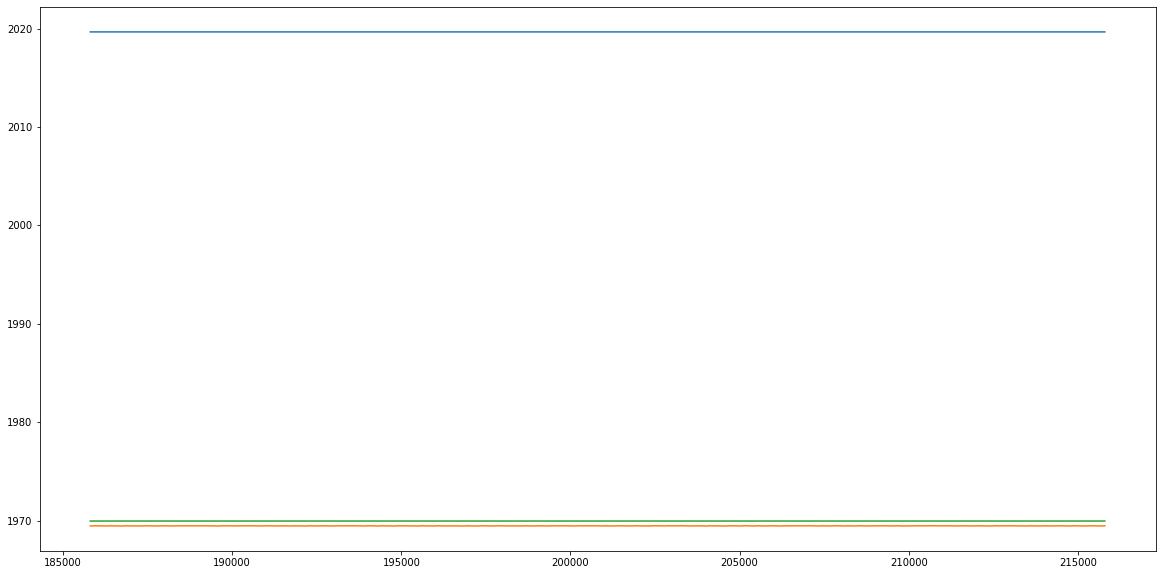

In [13]:
df_match = pd.read_csv('ftn+_age_match_20201224-Copy1.csv',sep=',')
df_match['NRS_time']=pd.to_datetime(df_match['NRS_time'])
df_match = df_match.rename(columns={'Unnamed: 0':'index'})
#df_match.reset_index(inplace=True, drop=True)

print(len(df_match))

srate= 100
for i in range(len(df_match)-1,-1,-1):
    if df_match.loc[i,'opid']==190828045:
        filename = str(df_match.loc[i,'Value'])+','+str(df_match.loc[i,'index'])+','+ df_match.loc[i,'path']

    #if not os.path.exists('../../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min/'+filename):
        print(i, end=' ')
        #try: 
        rec_path = '../../../cranberry2/Preprocessing/vital_data/pacu_ecg_pleth/pacu_ecg_pleth/'+df_match.loc[i,'path']
        #print(rec_path)
        #print('1')
        vfile_ecg = vitaldb.vital_recs_time(rec_path,['SNUADCW/ECG_II'],interval=0.01).flatten()
        vfile_ppg = vitaldb.vital_recs_time(rec_path,['SNUADCW/PLETH'],interval=0.01).flatten()

        #print(vfile)
        if len(vfile_ecg[0])==0 | len(vfile_ppg[0])==0:
            print('index ',df_match.loc[i,'index'],' OPID ',df_match.loc[i,'opid'],'empty vital file')
        else:
            Abs_time = [vfile_ecg[1]+datetime.timedelta(hours=9)+datetime.timedelta(seconds=i/srate) for i in range(len(vfile_ecg[0]))]
            #print(vfile[1])
            dics = {'Abs_time':Abs_time,'PPG':vfile_ppg[0],'ECG':vfile_ecg[0]}
            df_vital = pd.DataFrame(data=dics)
            end_idx_list = df_vital[(df_vital['Abs_time'] > df_match.loc[i,'NRS_time'] - datetime.timedelta(seconds=1)) & (df_vital['Abs_time'] < df_match.loc[i,'NRS_time'] + datetime.timedelta(seconds=1))].index.tolist()

            if len(end_idx_list)==0:
                print('index ',i,' OPID ',df_match.loc[i,'opid']," no vital data at NRS time")

            else:
                end_idx=end_idx_list[0]+1
                start_idx= end_idx - 5 * 60 * srate
                start_idx_n = max(0,start_idx)


                ext = df_vital[start_idx_n:end_idx]
                extr=ext.dropna(subset=['ECG'])
                extr=extr.drop_duplicates(subset=['ECG'])
                print('mean',np.nanmean(vfile_ecg[0]))
                print(df_match.loc[i,'NRS_time'])
                plt.figure(figsize=(20,10))
                plt.plot(ext)
                print(fdafsdfasdfsdaf)
                if len(extr)>1:
                    if start_idx <0 :
                        fit = (-1)*end_idx 
                        extraction = pd.DataFrame(index=range(5*60*srate),columns=['Abs_time','PPG','ECG'])
                        extraction[fit:]=ext
                        

                    else:
                        extraction = ext
                    #with open('../../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min/'+filename,'wb') as f:
                        #pickle.dump(extraction, f)
                    print('...done')
        #except:
            #print('error: ',i,df_match.loc[i,'opid'],df_match.loc[i,'path'])

In [20]:
for i in range(3):
    c = [i for i in range(2)]
    print(i, c)

0 [0, 1]
1 [0, 1]
2 [0, 1]


mean -4.998828062414211
2019-08-20 18:45:00
mean -4.998828062414211
2019-08-20 18:55:00
mean -4.998854843865835
2019-08-21 12:00:00
mean -4.998854843865835
2019-08-21 12:20:00
mean -4.999031185806558
2019-08-21 16:35:00
mean -4.999031185806558
2019-08-21 16:45:00
mean -4.99873178639031
2019-08-22 14:47:00
mean -4.99873178639031
2019-08-22 15:05:00


KeyboardInterrupt: 

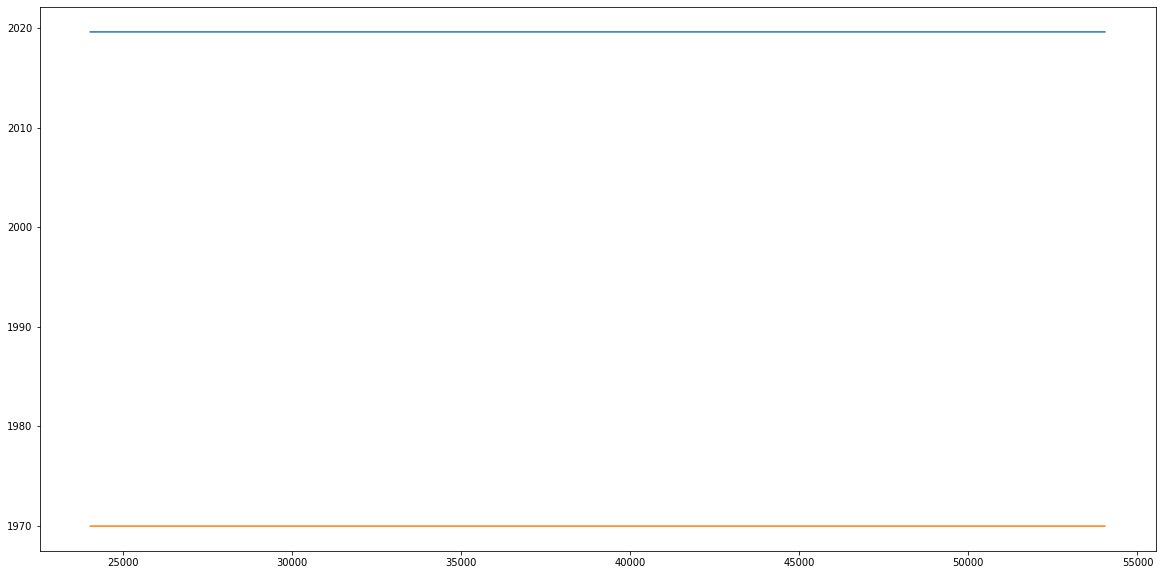

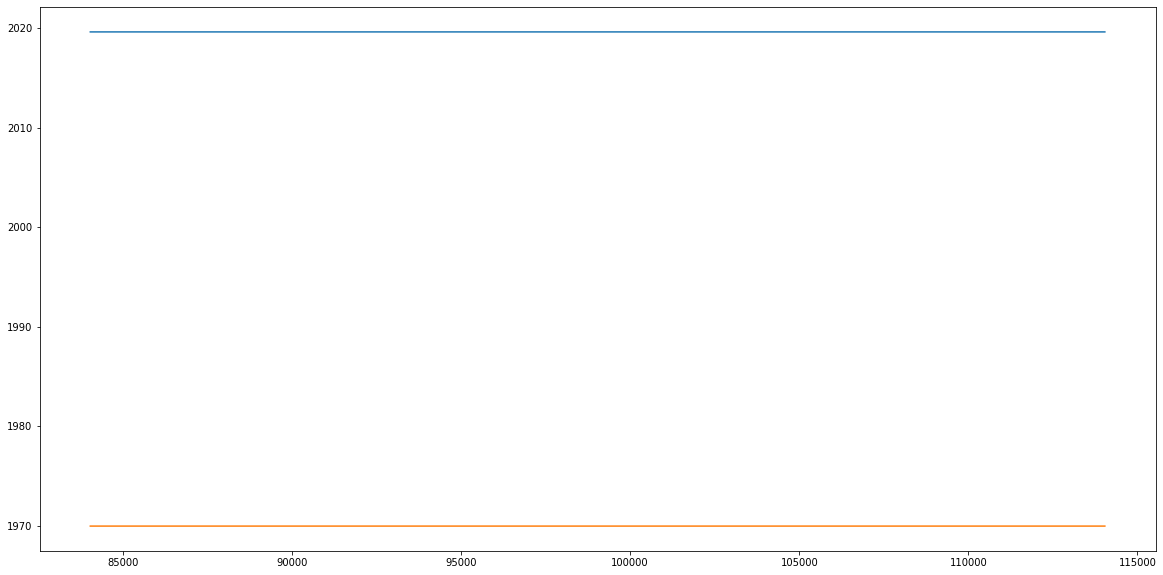

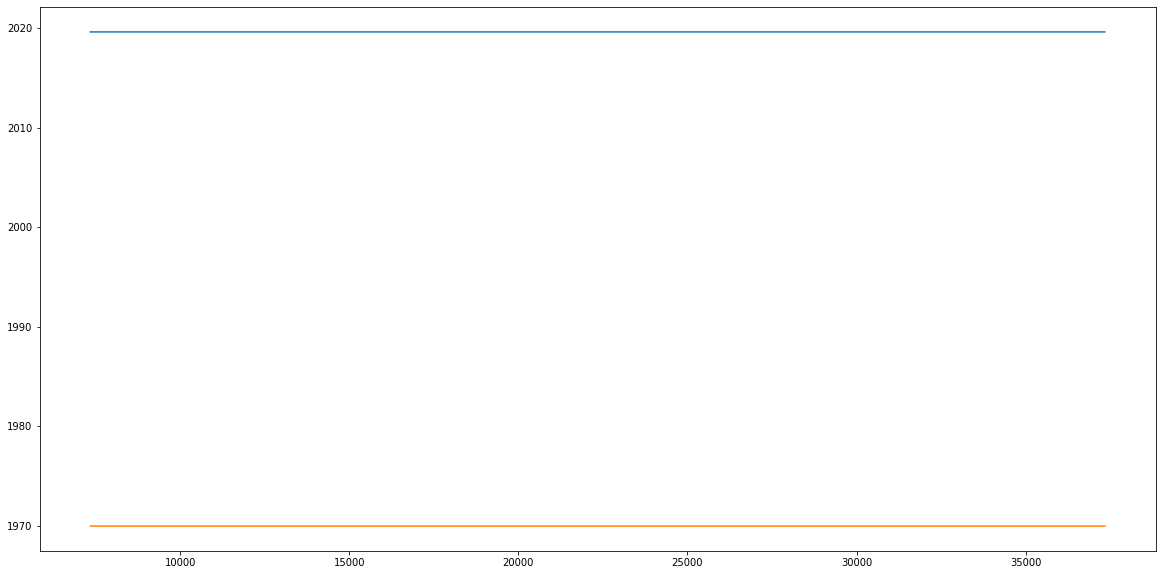

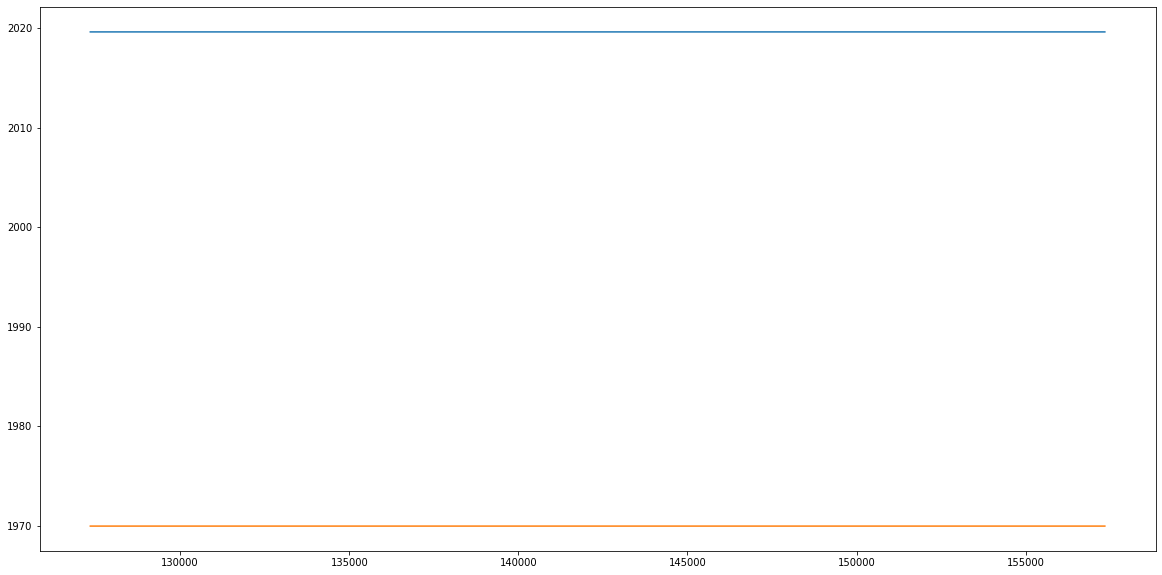

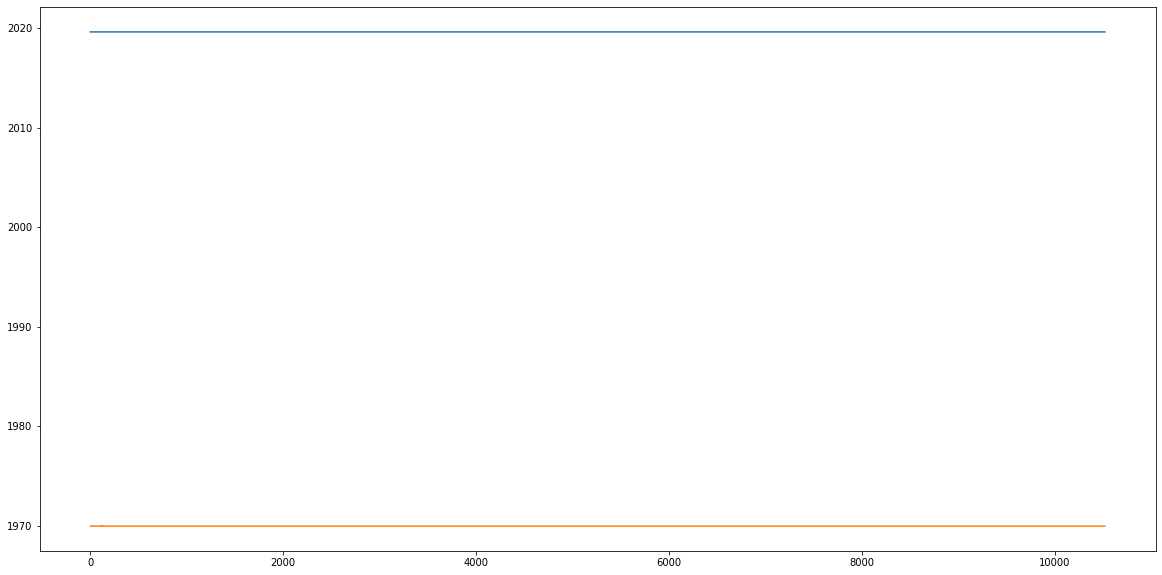

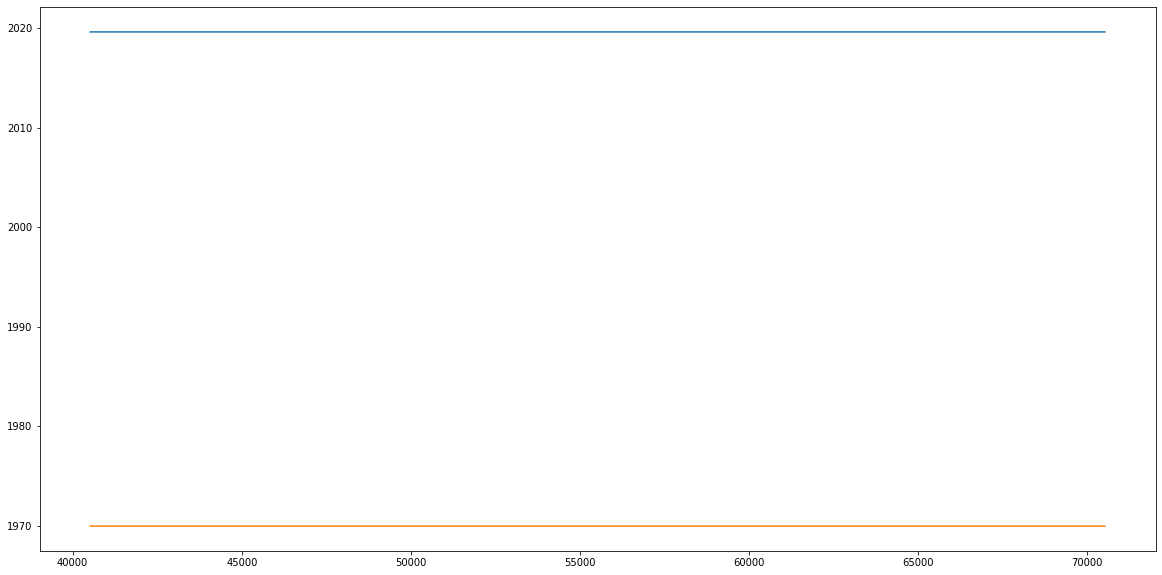

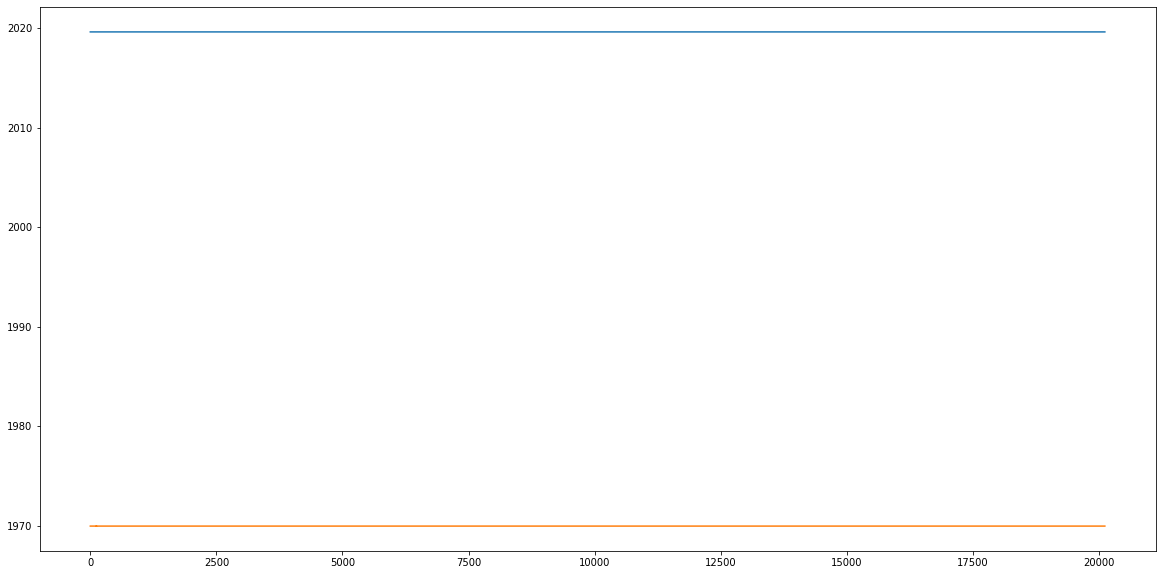

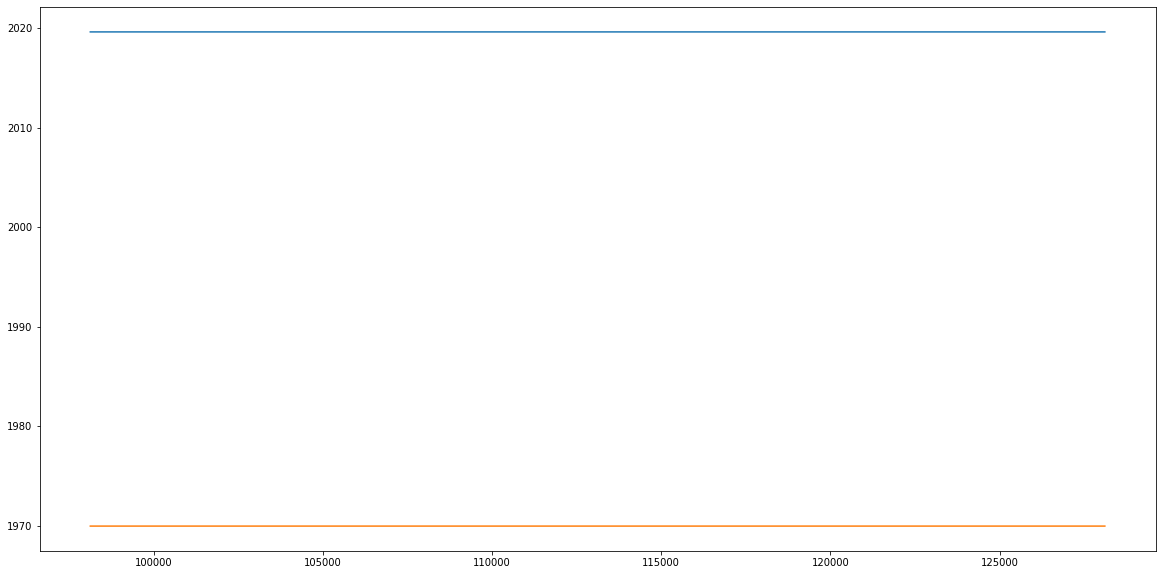

In [18]:
li = ['PACU1_7_190820_183559.csv', 'PACU1_4_190913_053908.csv','PACU1_2_190822_195429.csv', 'PACU1_2_190905_162107.csv','PACU1_5_190904_154406.csv','PACU1_1_190821_163312.csv','PACU1_5_191018_090953.csv','PACU1_7_190821_115346.csv','PACU1_3_190829_123317.csv','PACU1_8_190822_164342.csv','PACU1_1_191202_114436.csv','PACU1_5_190904_020403.csv', 'PACU1_7_190822_144339.csv']
li = [d[:-3]+'vital' for d in li]

for i in range(len(df_match)):
    if df_match.loc[i,'path'] in li:
        
        rec_path = '../../../cranberry2/Preprocessing/vital_data/pacu_ecg_pleth/pacu_ecg_pleth/' + df_match.loc[i,'path']
        vfile_ecg = vitaldb.vital_recs_time(rec_path,['SNUADCW/ECG_II'],interval=0.01).flatten()
        if len(vfile_ecg[0])==0 | len(vfile_ppg[0])==0:
            print('index ',df_match.loc[i,'index'],' OPID ',df_match.loc[i,'opid'],'empty vital file')

        else:
            Abs_time = [vfile_ecg[1]+datetime.timedelta(hours=9)+datetime.timedelta(seconds=j/srate) for j in range(len(vfile_ecg[0]))]
            #print(vfile[1])
            dics = {'Abs_time':Abs_time, 'ECG':vfile_ecg[0]}
            df_vital = pd.DataFrame(data=dics)
            end_idx_list = df_vital[(df_vital['Abs_time'] > df_match.loc[i,'NRS_time'] - datetime.timedelta(seconds=1)) & (df_vital['Abs_time'] < df_match.loc[i,'NRS_time'] + datetime.timedelta(seconds=1))].index.tolist()

            if len(end_idx_list)==0:
                print('index ',i,' OPID ',df_match.loc[i,'opid']," no vital data at NRS time")

            else:
                end_idx=end_idx_list[0]+1
                start_idx= end_idx - 5 * 60 * srate
                start_idx_n = max(0,start_idx)

                ext = df_vital[start_idx_n:end_idx]

                print('mean',np.nanmean(vfile_ecg[0]))
                print(df_match.loc[i,'NRS_time'])
                plt.figure(figsize=(20,10))
                plt.plot(ext)

# NIBP PACU pickle로 저장하기

In [4]:
import pandas as pd
import datetime
import time
import pickle
import os
import numpy as np
from pyvital2 import vitaldb

df_match = pd.read_csv('match_drug_arr_exclusion_20201110.csv',sep=',')
df_match['NRS_time']=pd.to_datetime(df_match['NRS_time'])
df_IDpath = pd.read_csv('opid_fileid.csv')
#df_match['path']=[f_name.split('.')[0]+".csv" for f_name in df_match['path'].values.flatten()]

for j in range(len(df_IDpath)):
    #try: 
    #opid match
    idx_list = df_match[df_match['opid']==df_IDpath.loc[j,'opid']].index.tolist()
    i = min(idx_list)

    rec_path = 'preop_vital/preop_vital/' + df_IDpath.loc[j,'fileid']
    df_IDpath.loc[j, 'file_path'] = df_match.loc[i, 'path']
    df_IDpath.loc[j, 'NRS'] = df_match.loc[i, 'Value']
    df_IDpath.loc[j, 'NRS_time'] = df_match.loc[i, 'NRS_time']
print(df_IDpath)
print(df_match)

           opid                  fileid                    file_path   NRS  \
0     190408044  A2_190408_103443.vital  PACU1_1_190408_115004.vital   6.0   
1     190408106  E3_190408_180036.vital  PACU1_1_190408_202459.vital   7.0   
2     190409012  A2_190409_073654.vital  PACU1_2_190409_110712.vital   4.0   
3     190409044  D5_190409_101311.vital  PACU1_3_190409_114333.vital   6.0   
4     190409057  F4_190409_105106.vital  PACU1_1_190409_133948.vital   8.0   
...         ...                     ...                          ...   ...   
4109  201030106  R9_201030_145209.vital  PACU1_1_201030_161119.vital   6.0   
4110  201030057  E6_201030_131959.vital  PACU1_3_201030_195639.vital   7.0   
4111  201030082  R2_201030_185910.vital  PACU1_5_201030_203752.vital   6.0   
4112  201030023  C4_201030_185047.vital  PACU1_1_201030_211816.vital   6.0   
4113  201031004  R9_201031_084856.vital  PACU1_3_201031_131135.vital  10.0   

                NRS_time  
0    2019-04-08 12:00:00  
1    2019

In [ ]:
import pandas as pd
import datetime
import time
import pickle
import os
import numpy as np
from pyvital2 import vitaldb

'''vital -> csv
df_match['path']=[f_name.split('.')[0]+".csv" for f_name in df_match['path'].values.flatten()] '''

srate= 250
for i in range(len(df_match)):
    bedno = df_match.loc[i,'path'].split('_')[1]
    if int(bedno) <4:
        filename = str(df_match.loc[i,'Value'])+','+str(i)+','+ df_match.loc[i,'path']
        if not os.path.exists('vital_data/NIBP_250Hz_pacu_2min_pickle/'+filename):
            rec_path = 'PACU_vital/PACU1_1-3/'+df_match.loc[i,'path']
            vfile = vitaldb.vital_recs_time(rec_path,['Solar8000/NIBP_MBP'],interval=0.004).flatten()
            #print(vfile)
            if len(vfile[0])==0:
                print('index ',i,' OPID ',df_match.loc[i,'opid'],'empty NIBP')
            else:
                Abs_time = [vfile[1]+datetime.timedelta(hours=9)+datetime.timedelta(seconds=i/srate) for i in range(len(vfile[0]))]
                #print(vfile[1])
                dics = {'Abs_time':Abs_time,'NIBP':vfile[0]}
                df_NIBP = pd.DataFrame(data=dics)
                end_idx_list = df_NIBP[(df_NIBP['Abs_time'] > df_match.loc[i,'NRS_time'] - datetime.timedelta(seconds=1)) & (df_NIBP['Abs_time'] < df_match.loc[i,'NRS_time'] + datetime.timedelta(seconds=1))].index.tolist()

                if len(end_idx_list)==0:
                    print('index ',i,' OPID ',df_match.loc[i,'opid']," no vital data at NRS time")                  
                else:
                    end_idx=end_idx_list[0]
                    start_idx= max(0,end_idx - 2 * 60 * srate)
                    extraction = df_NIBP.loc[start_idx:end_idx]
                    with open('vital_data/NIBP_250Hz_pacu_2min_pickle/'+filename,'wb') as f:
                        pickle.dump(extraction, f)
                        
#이건 2분보다 짧아도 저장함

# NIBP PACU pickle로 저장하기

In [ ]:
import pandas as pd
import pickle
import datetime
import time
from pyvital2 import vitaldb
import numpy as np
import os

'''vital -> csv
df_match['path']=[f_name.split('.')[0]+".csv" for f_name in df_match['path'].values.flatten()] '''

srate= 250
for i in range(len(df_IDpath)):
    filename = df_IDpath.loc[i,'file_path']
    if not os.path.exists('vital_data/NIBP_250Hz_preop_2min_pickle/'+filename):
        rec_path = 'preop_vital/preop_vital/'+ df_IDpath.loc[i,'fileid']
        vfile = vitaldb.vital_recs(rec_path,['Solar8000/NIBP_MBP'],interval=0.004).flatten()[0:2*60*250]

        #print(vfile)
        if len(vfile) ==0 :
            print('index ',i,' OPID ',df_IDpath.loc[i,'opid'],'empty NIBP')
        else:
            dics = {'NIBP':vfile}
            df_NIBP = pd.DataFrame(data=dics)

            extraction = df_NIBP
            with open('vital_data/NIBP_250Hz_preop_2min_pickle/'+filename,'wb') as f:
                pickle.dump(extraction, f)
            print(i,'/',len(df_IDpath),' save')